## 한 해 동안의 소비 트렌드 파악 프로젝트
## 위메프
- 기간, 성별, 연령을 구분지어 파악할 수 있어야한다
- 위메프 베스트
- 

In [2]:
# 특정 기간동안 연령별, 키워드별로 어떤 시기에 어떤 아이템을 가장 많이 찾는지를 알아보는 작업. 
# Naver dev api를 특정 주제군에 대한 동향 데이터만 제공한다.
# 연령별, 성별 검색어 순위를 제공하지는 않는듯

# 1차 : 쇼핑 플랫폼에서 사람들이 가장 선호하는 제품 키워드 각각 10개 정도씩 뽑아서 리스트업.
# 2차 : 구글, Naver에서 제공하는 검색트렌트 api에 이 키워드들을 넣어서 성별, 연령별 검색량의 추이(지정한 기간 내에서의..) 파악.

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rc
import json
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
import requests
from bs4 import BeautifulSoup
import re 
from selenium import webdriver
import time

### 위메프 베스트 각 카테고리의 키워드에 대한 동향파악
- https://openapi.naver.com/v1/datalab/search
- 각 카테고리 내부의 어떤 제품이 잘나가는지 동향파악
- 위메프 베스트에서 키워드 뽑아와서 필터링 -> Naver developer api의 datalab으로 키워드별 각 연도 동향 파악

In [7]:
## Naver developer datalab 어플리케이션 ID, SECRET

CLIENT_ID = 'u6hiDqzI59KsFrcace7m'
CLIENT_SECRET = 'Sx11g43rrR'

In [8]:
keyword = "글램브라 노와이어/스포츠브라팬티 외 여성속옷세트"
splited_keyword = list(filter(lambda text: len(text) > 1, keyword.split(" ")))
splited_keyword

['글램브라', '노와이어/스포츠브라팬티', '여성속옷세트']

In [9]:
url = 'https://openapi.naver.com/v1/datalab/search'
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET
}
params = {
    "startDate": "2019-01-01",
    "endDate": "2019-12-30",
    "timeUnit": "month",
    "keywordGroups": [
        {"groupName": splited_keyword[0], "keywords": splited_keyword},
    ],
    "gender": "f",
    "ages": ['3', '4', '5']   # 19 ~ 34세
}

In [10]:
response = requests.post(url, json.dumps(params), headers=headers)
response

<Response [200]>

In [11]:
## 받아온 데이터 전처리 

datas = response.json()['results']

dfs = []
for data in datas:
    df = pd.DataFrame(data["data"])
    df["title"] = data["title"]
    dfs.append(df)
    
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail()

,period,ratio,title
7,2019-08-01,89.80326,글램브라
8,2019-09-01,78.74624,글램브라
9,2019-10-01,68.66288,글램브라
10,2019-11-01,64.94831,글램브라
11,2019-12-01,73.60453,글램브라


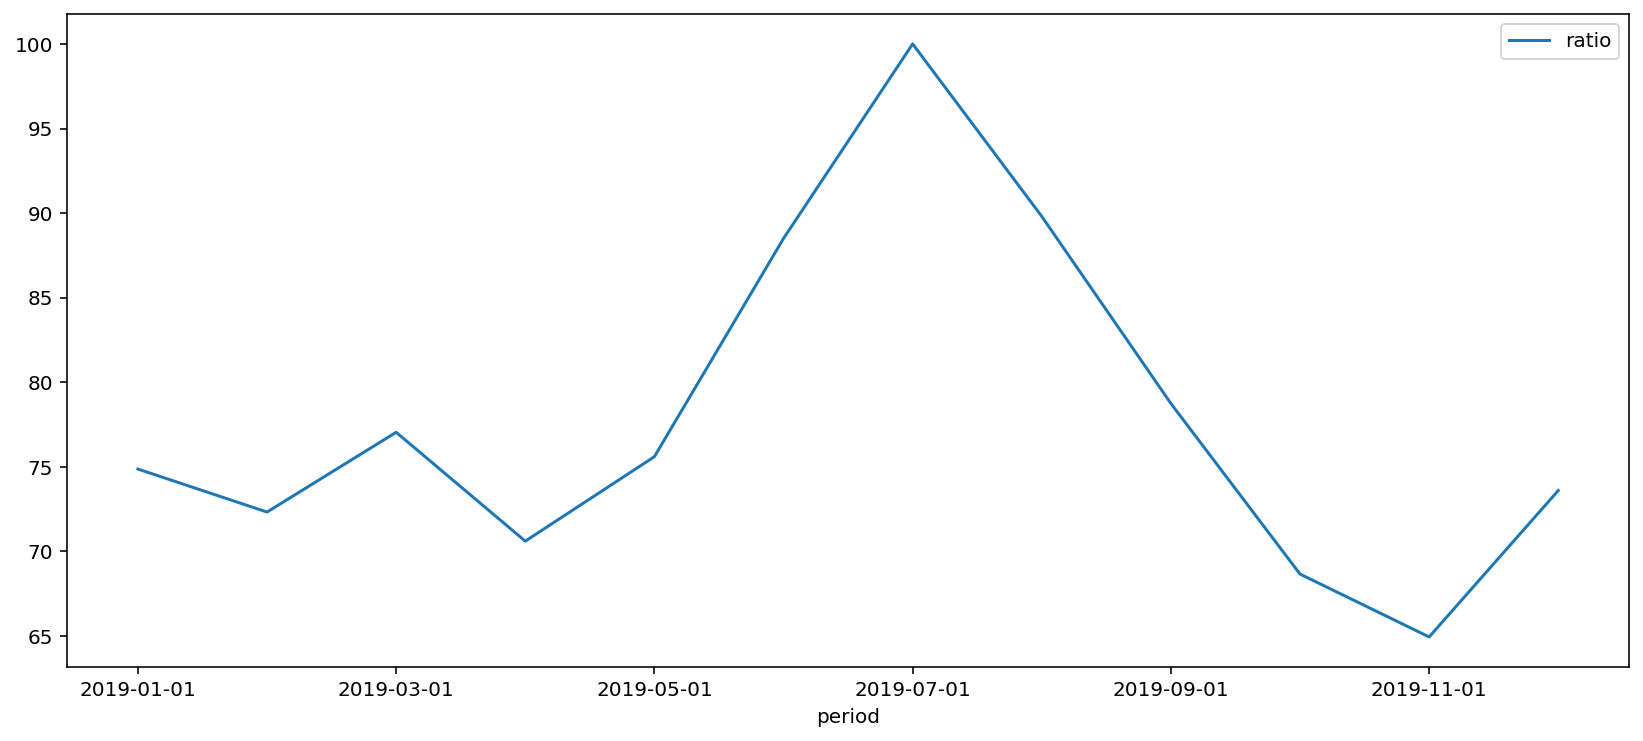

In [12]:
result_df.plot(x='period', y='ratio', figsize=(14, 6));